In [ ]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "False"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"


from susie.model import create_sample_fn
from susie.jax_utils import initialize_compilation_cache
import numpy as np
from PIL import Image




class DiffusionModel:
    def __init__(self):
        initialize_compilation_cache()

        self.sample_fn = create_sample_fn(
            "/home/user/zyn/susie-airbot-libero/test",
            "zhengyinan-air/susie/siasmzdq",
            num_timesteps=50,
            prompt_w=7.5,
            context_w=1.5,
            eta=0.0,
            pretrained_path="/home/user/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/ba3e4bb1bac6871f4bd33c4a4453acb9813477e7:flax",
        )

    def generate(self, language_command, image_obs, flip=True):

        if flip == True:
            image_obs = [img.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM).resize((256, 256)) for img in image_obs]
        else:
            image_obs = [img.resize((256, 256)) for img in image_obs]

        image_obs = np.array(image_obs).astype(np.uint8)

        samples = self.sample_fn(image_obs, language_command, prompt_w=7.5, context_w=1.5)

        if flip == True:
            samples = [Image.fromarray(sample).transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM) for sample in samples]
        else:
            samples = [Image.fromarray(sample) for sample in samples]
        return samples

/home/amax/anaconda3/envs/susie-eval/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-21 17:00:13.616748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 17:00:13.616796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 17:00:13.618227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 17:00:14.175878: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
import jax
print(jax.devices())

[CudaDevice(id=0)]


In [3]:
susie_diffusion = DiffusionModel()

/home/amax/anaconda3/envs/susie-eval/lib/python3.10/site-packages/orbax/checkpoint/_src/serialization/type_handlers.py:1136: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(
The config attributes {'pretrained': 'kvablack/instruct-pix2pix-flax'} were passed to FlaxUNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [4]:
images = [Image.open('/data/libero/data_jpg/libero_10/KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it_demo/demo_0/image0/0.jpg'), Image.open('/data/libero/data_jpg/libero_10/LIVING_ROOM_SCENE1_put_both_the_alphabet_soup_and_the_cream_cheese_box_in_the_basket_demo/demo_0/image0/0.jpg')]
images_out = susie_diffusion.generate(["turn on the stove and put the moka pot on it", "put both the alphabet soup and the cream cheese box in the basket"], images, flip=True)

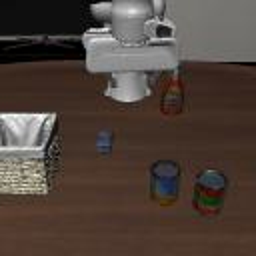

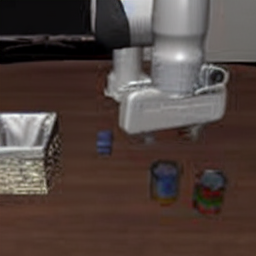

In [5]:
# to display the images if you're in a Jupyter notebook
display(images[1].transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM).resize((256, 256)))
display(images_out[1].transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM).resize((256, 256)))